In [175]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [176]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [177]:
df = pd.read_csv("Desktop/hypothyroid.csv")

In [178]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [179]:
df.shape

(3772, 30)

In [180]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [181]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG','TBG measured','referral source','query on thyroxine','query hypothyroid','query hyperthyroid'],axis = 1)

In [182]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
binaryClass                  object
dtype: object

# Changing the values into model - readable values

In [183]:
df = df.replace({'f':0,'t':1})

In [184]:
df['sex'] = df['sex'].replace({'F':0,'M':1})

In [185]:
df = df.replace({'?':np.nan})

In [186]:
df[['age','TSH','T3','TT4','T4U','FTI']] = df[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)

In [187]:
df['binaryClass'] = df['binaryClass'].replace({'P':0,'N':1})

In [188]:
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
binaryClass                    int64
dtype: object

In [189]:
df.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,0
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,0
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,0
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0


In [190]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

<AxesSubplot:xlabel='age'>

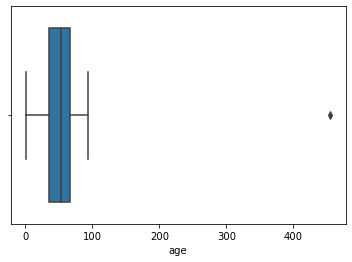

In [191]:
sns.boxplot(df['age'])

In [192]:
df = df[df['age'] < 400]

<AxesSubplot:xlabel='age'>

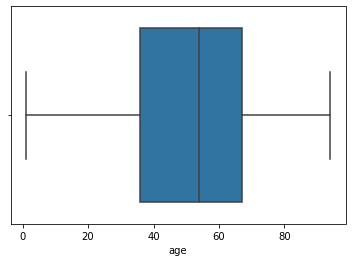

In [193]:
sns.boxplot(df['age'])

In [194]:
from sklearn.model_selection import train_test_split

y = df['binaryClass']
X = df.drop(['binaryClass'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 20)

In [195]:
X_train['TSH'].min()

0.005

In [196]:
X_test['TSH'].min()

0.005

# Imputation of missing values using KNNImputer

In [197]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=5, weights = 'distance')

X_train_imp = pd.DataFrame(knnimp.fit_transform(X_train), columns = X.columns.values.tolist())
X_test_imp = pd.DataFrame(knnimp.transform(X_test), columns = X.columns.values.tolist())

In [198]:
X_train_imp.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94,2.400000,80.0,1.06,76.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,3.000000,143.0,1.33,108.0
2,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,3.700000,169.0,1.14,148.0
3,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.849656,98.0,0.72,136.0
4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.90,2.400000,129.0,1.18,109.0


In [199]:
X_test_imp.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.00,1.70,75.0,0.748606,105.713652
1,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30,1.40,124.0,0.860000,144.000000
2,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.18,2.36,88.6,1.000000,91.200000
3,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20,2.30,74.0,0.939658,87.231239
4,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30,2.30,83.0,1.190000,69.000000


# Feature selection using Mutual Information Gain

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X_train_imp,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_imp.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Features', y='Score', data=featureScores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize = 7)

In [200]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train_imp,y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TSH                          0.209433
FTI                          0.077745
TT4                          0.068586
T3                           0.022130
age                          0.013443
sick                         0.008690
on thyroxine                 0.008606
sex                          0.003627
T4U                          0.002839
thyroid surgery              0.002600
tumor                        0.000400
goitre                       0.000030
pregnant                     0.000000
I131 treatment               0.000000
lithium                      0.000000
hypopituitary                0.000000
psych                        0.000000
on antithyroid medication    0.000000
dtype: float64

# Transformation of skewed variables

<AxesSubplot:xlabel='FTI', ylabel='Density'>

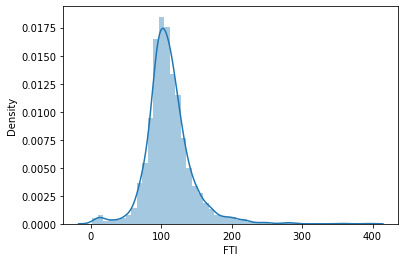

In [201]:
sns.distplot(X_train_imp['FTI'])

In [202]:
X_train_imp['FTI'] = (X_train_imp['FTI'])**0.5

<AxesSubplot:xlabel='FTI', ylabel='Density'>

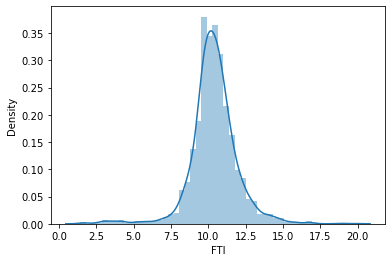

In [203]:
sns.distplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='FTI'>

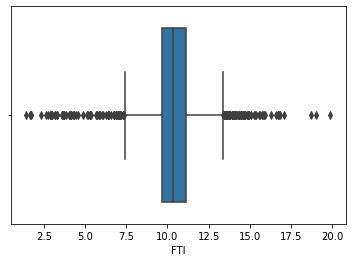

In [204]:
sns.boxplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='TSH', ylabel='Density'>

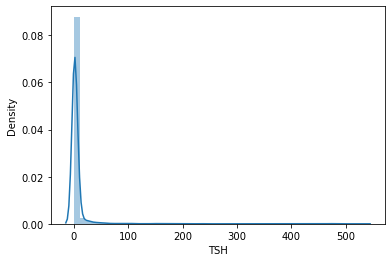

In [205]:
sns.distplot(X_train_imp['TSH'])

In [206]:
X_train_imp['TSH'] = np.log(X_train_imp['TSH'])

<AxesSubplot:xlabel='TSH', ylabel='Density'>

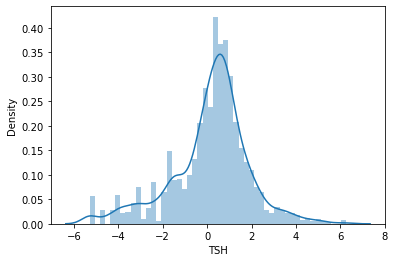

In [207]:
sns.distplot(X_train_imp['TSH'])

<AxesSubplot:xlabel='TSH'>

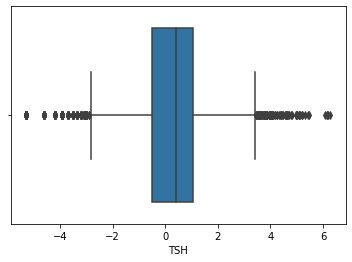

In [208]:
sns.boxplot(X_train_imp['TSH'])

<AxesSubplot:xlabel='TT4', ylabel='Density'>

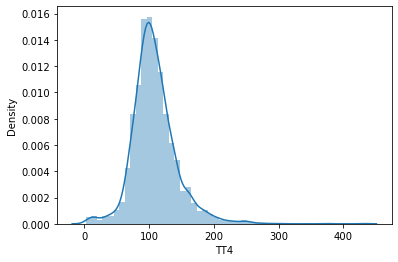

In [209]:
sns.distplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='TT4', ylabel='Density'>

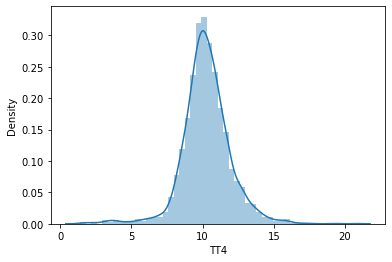

In [210]:
sns.distplot((X_train_imp['TT4'])**0.5)

<AxesSubplot:xlabel='TT4'>

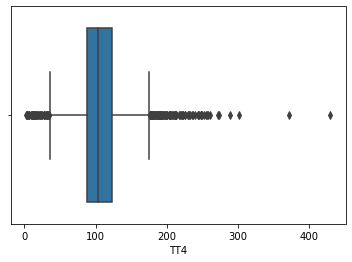

In [211]:
sns.boxplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='T3', ylabel='Density'>

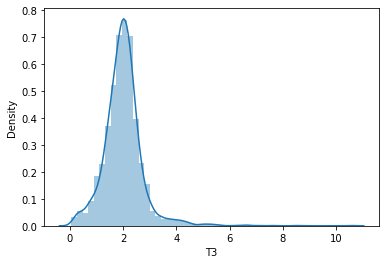

In [212]:
sns.distplot(X_train_imp['T3'])

<AxesSubplot:xlabel='T3'>

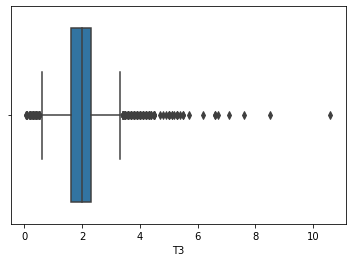

In [213]:
sns.boxplot(X_train_imp['T3'])

In [214]:
X_train_imp['T3'] = (X_train_imp['T3'])**0.5

<AxesSubplot:xlabel='T3', ylabel='Density'>

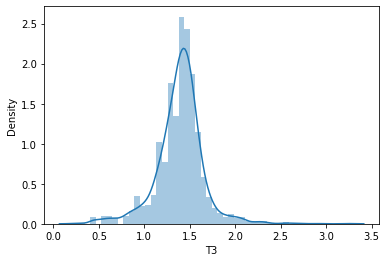

In [215]:
sns.distplot(X_train_imp['T3'])

<AxesSubplot:xlabel='T3'>

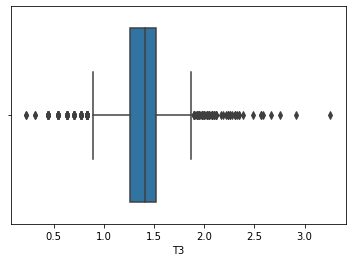

In [216]:
sns.boxplot(X_train_imp['T3'])

# Capping of outliers using Inter Quartile Range (IQR)

In [217]:
def outlier(x,df):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    
    def outlier_treat(y):
        if y<ll:
            return ll
        elif y>ul:
            return ul
        else:
            return y
    df[x] = df[x].apply(outlier_treat)

In [218]:
for col in ['TSH', 'FTI', 'TT4', 'T3']: 
    outlier(col,X_train_imp)

<AxesSubplot:xlabel='T3'>

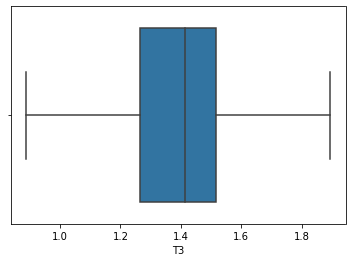

In [219]:
sns.boxplot(X_train_imp['T3'])

<AxesSubplot:xlabel='FTI'>

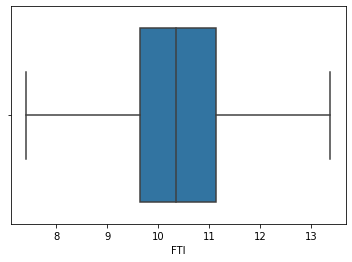

In [220]:
sns.boxplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='TT4'>

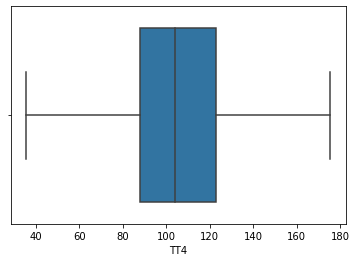

In [221]:
sns.boxplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='TSH'>

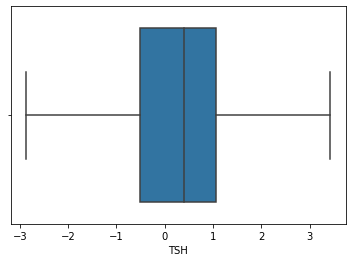

In [222]:
sns.boxplot(X_train_imp['TSH'])

In [223]:
X_train_ft_imp = X_train_imp[['TSH', 'FTI', 'TT4', 'T3', 'age']]

In [224]:
X_test_imp['FTI'] = (X_test_imp['FTI'])**0.5
X_test_imp['T3'] = (X_test_imp['T3'])**0.5
X_test_imp['TSH'] = np.log((X_test_imp['TSH']))
X_test_imp['TT4'] = (X_test_imp['TT4'])**0.5

In [225]:
X_test_ft_imp = X_test_imp[['TSH', 'FTI', 'TT4', 'T3', 'age']]

In [226]:
X_train_ft_imp.head()

,TSH,FTI,TT4,T3,age
0,-0.061875,8.717798,80.0,1.549193,45.0
1,-1.386294,10.392305,143.0,1.732051,24.0
2,-2.874130,12.165525,169.0,1.894071,51.0
3,-1.609438,11.661904,98.0,1.360021,64.0
4,0.641854,10.440307,129.0,1.549193,23.0


In [227]:
X_test_ft_imp.head()

,TSH,FTI,TT4,T3,age
0,2.772589,10.281714,8.660254,1.303840,33.0
1,0.832909,12.000000,11.135529,1.183216,67.0
2,0.779325,9.549869,9.412757,1.536229,21.0
3,0.182322,9.339767,8.602325,1.516575,73.0
4,0.832909,8.306624,9.110434,1.516575,35.0


<AxesSubplot:xlabel='binaryClass', ylabel='count'>

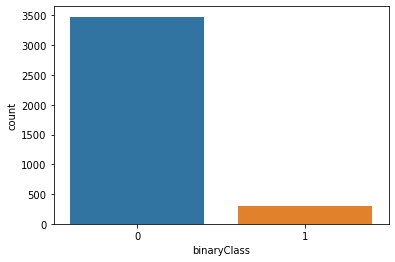

In [228]:
sns.countplot(df['binaryClass'])

In [229]:
df['binaryClass'].value_counts(normalize = True)

0    0.922812
1    0.077188
Name: binaryClass, dtype: float64

# Standardization of values before oversampling

In [230]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train_ft_imp = sc.fit_transform(X_train_ft_imp)
scaled_X_test_ft_imp = sc.transform(X_test_ft_imp)

# Use of SMOTE for oversampling the minority class

In [231]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [232]:
counter = Counter(y_train)
print('Before: ', counter)

smt = SMOTE()
scaled_X_train_ft_imp_smt,y_train_smt = smt.fit_resample(scaled_X_train_ft_imp, y_train)

counter_sm = Counter(y_train_smt)
print('After: ', counter_sm)

Before:  Counter({0: 2770, 1: 246})
After:  Counter({0: 2770, 1: 2770})


# MODEL FITTING

## Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train_ft_imp_smt, y_train_smt)

LogisticRegression()

In [234]:
pred_train = log_reg.predict(scaled_X_train_ft_imp_smt)
pred_test = log_reg.predict(scaled_X_test_ft_imp)

In [235]:
print(accuracy_score(y_train_smt,pred_train))

0.9671480144404332


In [236]:
print(accuracy_score(y_test,pred_test))

0.9350132625994695


In [237]:
cmat_tree = pd.DataFrame(confusion_matrix(y_test,pred_test), index = ['Actual: No', 'Actual: Yes'], columns = ['Predicted: No', 'Predicted: Yes'])
cmat_tree

,Predicted: No,Predicted: Yes
Actual: No,660,49
Actual: Yes,0,45


## SVM

In [238]:
from sklearn.svm import SVC
def classification(model,scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test):
    model.fit(scaled_X_train_ft_imp_smt, y_train_smt)
    train_pred = model.predict(scaled_X_train_ft_imp_smt)
    test_pred = model.predict(scaled_X_test_ft_imp)
    print(model)
    print('Accuracy on training set: ', accuracy_score(y_train_smt, train_pred))
    print('Accuracy on test set: ', accuracy_score(y_test, test_pred))

In [239]:
classification(SVC(kernel = 'rbf'),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC()
Accuracy on training set:  0.9694945848375451
Accuracy on test set:  0.9350132625994695


In [240]:
classification(SVC(kernel = 'linear'),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC(kernel='linear')
Accuracy on training set:  0.9646209386281589
Accuracy on test set:  0.9350132625994695


In [241]:
classification(SVC(kernel = 'poly', degree = 2),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC(degree=2, kernel='poly')
Accuracy on training set:  0.8750902527075812
Accuracy on test set:  0.9177718832891246


## DECISION TREE

In [242]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 5)
dtc.fit(scaled_X_train_ft_imp_smt, y_train_smt)

DecisionTreeClassifier(random_state=5)

In [243]:
pred_train = dtc.predict(scaled_X_train_ft_imp_smt)
pred_test = dtc.predict(scaled_X_test_ft_imp)

In [244]:
print(accuracy_score(y_train_smt,pred_train))

0.9994584837545126


In [245]:
print(accuracy_score(y_test,pred_test))

0.9522546419098143


### Our tree is overfitting, so we have to prune it

In [246]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,4,5],
         'min_samples_split':range(36,51),
         'min_samples_leaf':range(20,36),
         'max_features': range(3,5)}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid = params, cv = 5, scoring = 'accuracy')
grid.fit(scaled_X_train_ft_imp_smt,y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_features': range(3, 5),
                         'min_samples_leaf': range(20, 36),
                         'min_samples_split': range(36, 51)},
             scoring='accuracy')

In [247]:
grid.best_score_

0.9768953068592058

In [248]:
grid.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 23,
 'min_samples_split': 47}

In [249]:
tree_best = grid.best_estimator_
tree_best.fit(scaled_X_train_ft_imp_smt,y_train_smt)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=23,
                       min_samples_split=47)

In [250]:
train_pred = tree_best.predict(scaled_X_train_ft_imp_smt)
test_pred = tree_best.predict(scaled_X_test_ft_imp)

In [251]:
accuracy_score(y_train_smt,train_pred)

0.976173285198556

In [252]:
accuracy_score(y_test,test_pred)

0.9482758620689655

In [253]:
cmat_tree = pd.DataFrame(confusion_matrix(y_test,test_pred), index = ['Actual: No', 'Actual: Yes'], columns = ['Predicted: No', 'Predicted: Yes'])
cmat_tree

,Predicted: No,Predicted: Yes
Actual: No,670,39
Actual: Yes,0,45


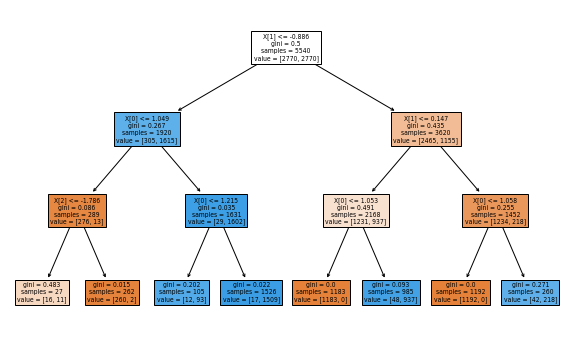

In [254]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import tree
plt.figure(figsize = (10,6))
tree.plot_tree(tree_best, filled = True)
plt.show()

# As we can see, Decision Tree gives us the best results for this dataset